In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

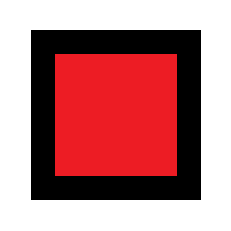

(9, 9, 4)


In [6]:
tiles_path = "../tiles/city.png"
img = np.asarray(Image.open(tiles_path))
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

# Get all the tiles

In [7]:
def plot_tiles(list_tiles:list,img=None):
    nb_tiles = len(list_tiles)
    if img is None:
        a,b = nb_tiles//20+1, 20
    else:
        a,b = img.shape[:2]
        a-=2
        b-=2

    fig, axs = plt.subplots(a, b, figsize=(10,10))
    for ax, tile in zip(axs.flat, list_tiles):
        ax.imshow(tile)
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
    plt.show()
    print(f'There is {nb_tiles} tiles in totals')

(10, 10, 4)


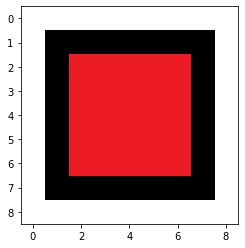

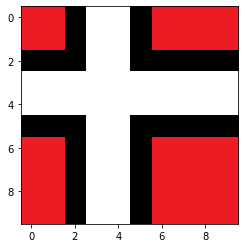

In [8]:
import numpy as np

def copy_tile(source, sx, sy, w):
    """
    Copy a w x w tile from the source image to the destination array, 
    wrapping around edges using modulo indexing.

    Args:
    - source (np.ndarray): Source image as a (H, W, 4) NumPy array (RGBA).
    - sx (int): X-coordinate of the top-left corner in the source.
    - sy (int): Y-coordinate of the top-left corner in the source.
    - w (int): Width of the tile.
    """

    H, W, _ = source.shape  # Get source dimensions

    # Compute wrapped indices for x and y using modulo
    x_indices = np.mod(np.arange(sx, sx + w), W)
    y_indices = np.mod(np.arange(sy, sy + w), H)

    # Extract the tile using NumPy advanced indexing
    tile = source[np.ix_(y_indices, x_indices)]  # Shape (w, w, 4)

    # Copy to destination
    return tile


# Example: Create a dummy source image (RGBA)
source = img

# Copy a tile from (sx=95, sy=95) to dest (size 10x10)
dest = copy_tile(source, 95, 95, 10)
print(dest.shape)
plt.imshow(source)
plt.show()
plt.imshow(dest)
plt.show()

81 tiles extracted


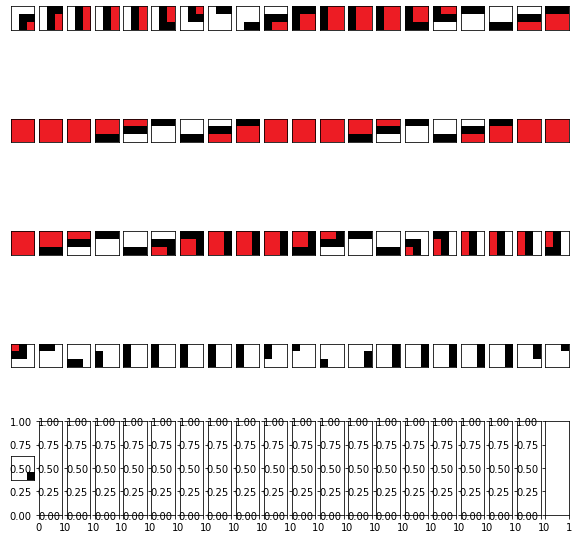

There is 81 tiles in totals


In [9]:
def extract_tiles_from_img(img:np.array, tile_size:int) -> list:
    extracted_tiles = []
    N,M,_ = img.shape
    for i in range(N):
        for j in range(M):
            # tile = img[i:i+tile_size[0],j:j+tile_size[1]]
            tile = copy_tile(img, i, j, tile_size)
            extracted_tiles.append(tile)
    return extracted_tiles

tiles = extract_tiles_from_img(img,3)
print(f'{len(tiles)} tiles extracted')
plot_tiles(tiles)

In [10]:
def create_uniform_tile(tile: np.ndarray, size: int) -> np.ndarray:
    """
    Creates a new tile of given size filled with the middle pixel of the input tile.
    
    Parameters:
        tile (np.ndarray): Input tile (2D or 3D NumPy array).
        size (int): Size of the output tile (size x size).
    
    Returns:
        np.ndarray: A new tile filled with the middle pixel value.
    """
    # Get the dimensions of the input tile
    h, w = tile.shape[:2]

    # Find the middle pixel coordinates
    mid_x, mid_y = h // 2, w // 2

    # Extract the middle pixel (handles both grayscale and RGB images)
    middle_pixel = tile[mid_x, mid_y]

    # Create a new tile filled with the middle pixel value
    new_tile = np.full((size, size, *middle_pixel.shape) if tile.ndim == 3 else (size, size), middle_pixel, dtype=tile.dtype)

    return new_tile


# Image.fromarray(create_uniform_tile(tiles[0],20), mode='RGBA').show()

# Get more tiles by rotating the image

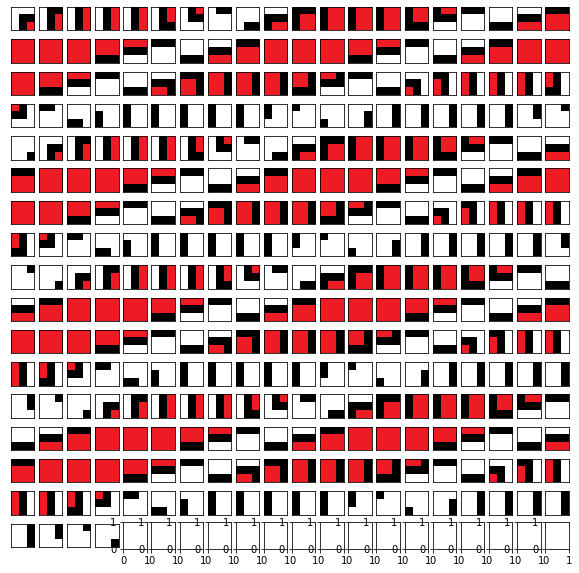

There is 324 tiles in totals


In [11]:
def extract_tiles_from_img_with_rotation(img):
    result = []
    copy = img.copy()
    for _ in range(4):
        result += extract_tiles_from_img(copy,3)
        copy = np.rot90(copy)
    return result

tiles = extract_tiles_from_img_with_rotation(img)
plot_tiles(tiles)

# Filter for unique Tiles

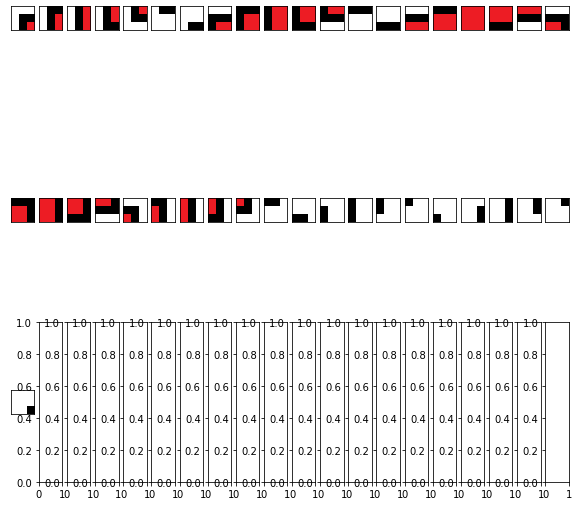

There is 41 tiles in totals


In [12]:
def get_unique_tiles(list_tiles):
    unique = []
    def is_in_list(list,element):
        for elem in list:
            if np.array_equal(elem,element):
                return True
    for tile in list_tiles:
        if not is_in_list(unique,tile):
            unique.append(tile)
    
    return unique

tiles = extract_tiles_from_img_with_rotation(img)
unique = get_unique_tiles(tiles)
plot_tiles(unique)

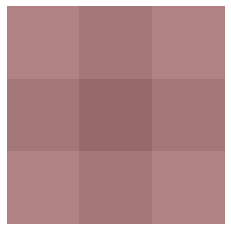

[[[176.41463415 130.53658537 132.29268293 255.        ]
  [163.97560976 118.09756098 119.85365854 255.        ]
  [176.41463415 130.53658537 132.29268293 255.        ]]

 [[163.97560976 118.09756098 119.85365854 255.        ]
  [151.53658537 105.65853659 107.41463415 255.        ]
  [163.97560976 118.09756098 119.85365854 255.        ]]

 [[176.41463415 130.53658537 132.29268293 255.        ]
  [163.97560976 118.09756098 119.85365854 255.        ]
  [176.41463415 130.53658537 132.29268293 255.        ]]]


In [13]:
plt.imshow(np.mean(unique,axis=0)/255)
plt.axis('off')
plt.show()
print(np.mean(unique,axis=0))

In [14]:
def frequency_tiles(tiles_list):
    unique_tiles = get_unique_tiles(tiles_list)
    frequency = np.zeros(len(unique_tiles))
    for t1 in tiles_list:
        for idx, t2 in enumerate(unique_tiles):
            if np.array_equal(t1, t2):
                frequency[idx] +=1
    
    return frequency

print(frequency_tiles(tiles))

[ 4.  4. 12.  4.  4.  4.  4.  4.  4. 12.  4.  4. 20. 20. 12. 12. 36. 12.
 12.  4.  4. 12.  4.  4.  4.  4. 12.  4.  4.  4.  4.  4. 20.  4.  4.  4.
  4. 20.  4.  4.  4.]


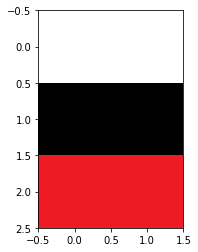

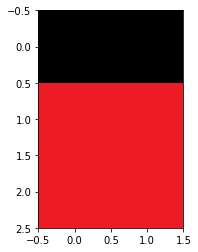

In [15]:
plt.imshow(unique[14][:,:2])
plt.show()
plt.imshow(unique[15][:,1:])
plt.show()

In [16]:
def overlaping_tile_east(tile1, tile2):
    return np.array_equal(tile1[:,1:],tile2[:,:2])

def overlaping_tile_south(tile1, tile2):
    return np.array_equal(tile1[1:,:],tile2[:2,:])

def overlaping_tile_west(tile1, tile2):
    return np.array_equal(tile1[:,:2],tile2[:,1:])

def overlaping_tile_north(tile1, tile2):
    return np.array_equal(tile1[:2,:],tile2[1:,:])



In [17]:
NORTH = 0
EAST = 1
SOUTH = 2
WEST = 3

def evaluate_neighboor(list_tiles):
    neighboor = {i:[[],[],[],[]] for i in range(len(list_tiles))}
    for i, tile1 in enumerate(list_tiles):
        for j, tile2 in enumerate(list_tiles):
            neighboor[i][NORTH].append(j) if overlaping_tile_north(tile1, tile2) else None
            neighboor[i][EAST].append(j) if overlaping_tile_east(tile1, tile2) else None
            neighboor[i][SOUTH].append(j) if overlaping_tile_south(tile1, tile2) else None
            neighboor[i][WEST].append(j) if overlaping_tile_west(tile1, tile2) else None
    
    return neighboor

nb = evaluate_neighboor(unique)


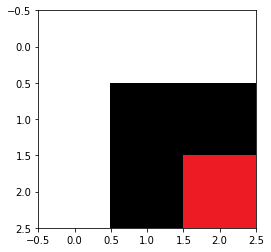

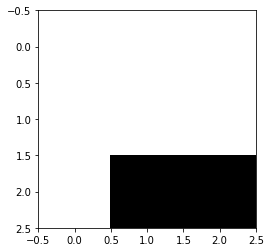

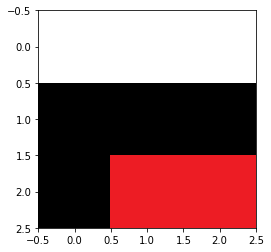

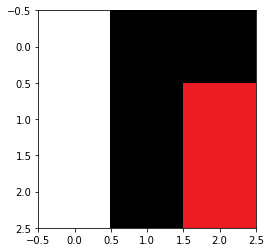

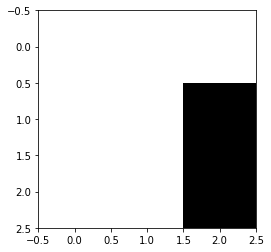

In [20]:
plt.imshow(unique[0])
plt.show()
for element in nb[0]:
    plt.imshow(unique[element[0]])

    plt.show()